In [44]:
import pandas as pd
df = pd.read_csv('../data/gold/schengen-visa.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
df['visas_applied'] = df['visas_applied'].astype('int')
df['visas_issued'] = df['visas_issued'].astype('int')
df['visas_not_issued'] = df['visas_not_issued'].astype('int')
df['year'] = df['year'].astype('str')
df['date'] = pd.to_datetime(df['year'], format='%Y')

In [46]:
df.dtypes

schengen_state               object
origin_country               object
origin_consulate             object
visas_applied                 int64
visas_issued                  int64
visas_not_issued              int64
visa_refusal_rate           float64
year                         object
date                 datetime64[ns]
dtype: object

In [47]:
df.describe()

,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate
count,"37,553.00","37,553.00","37,553.00","36,604.00"
mean,"6,108.15","5,623.45",446.70,0.11
std,"28,578.26","27,612.20","2,213.93",0.17
min,0.00,0.00,0.00,0.00
25%,44.00,41.00,1.00,0.00
50%,518.00,440.00,20.00,0.04
75%,"2,933.00","2,482.00",219.00,0.15
max,"1,204,670.00","1,195,130.00","127,615.00",1.00


In [48]:
df.head()

,schengen_state,origin_country,origin_consulate,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate,year,date
0,Austria,ALBANIA,TIRANA,50,39,6,0.13,2022,2022-01-01
1,Austria,ALGERIA,ALGIERS,2047,1213,831,0.41,2022,2022-01-01
2,Austria,ARGENTINA,BUENOS AIRES,18,18,0,0.00,2022,2022-01-01
3,Austria,AUSTRALIA,CANBERRA,1776,1751,22,0.01,2022,2022-01-01
4,Austria,AZERBAIJAN,BAKU,1788,1751,33,0.02,2022,2022-01-01


<AxesSubplot:xlabel='year'>

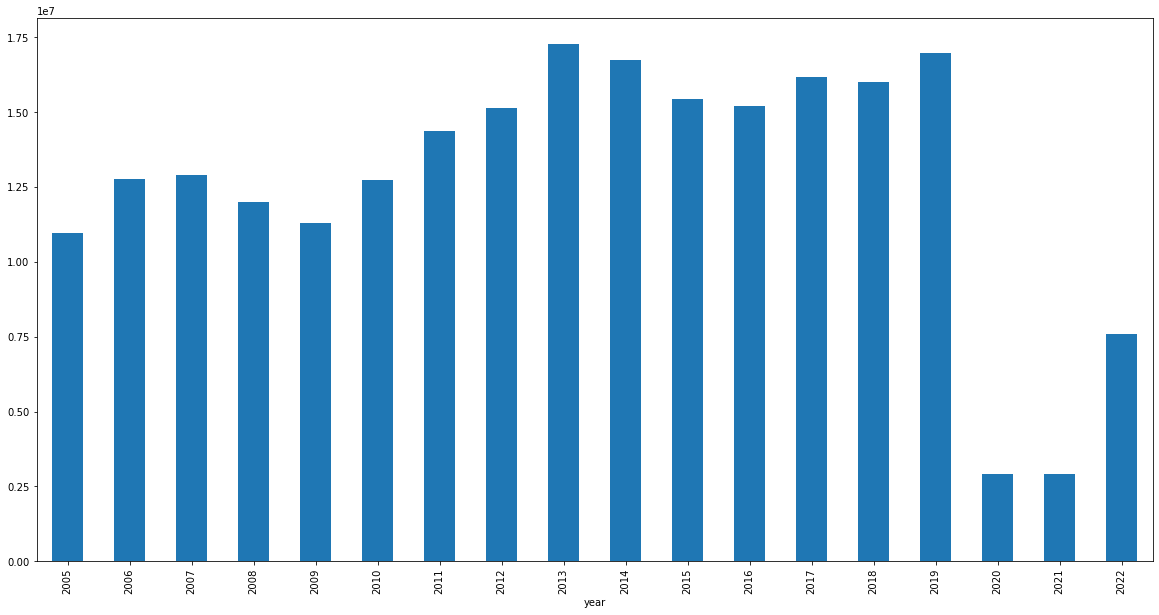

In [49]:
df.groupby(['year'])['visas_applied'].sum().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

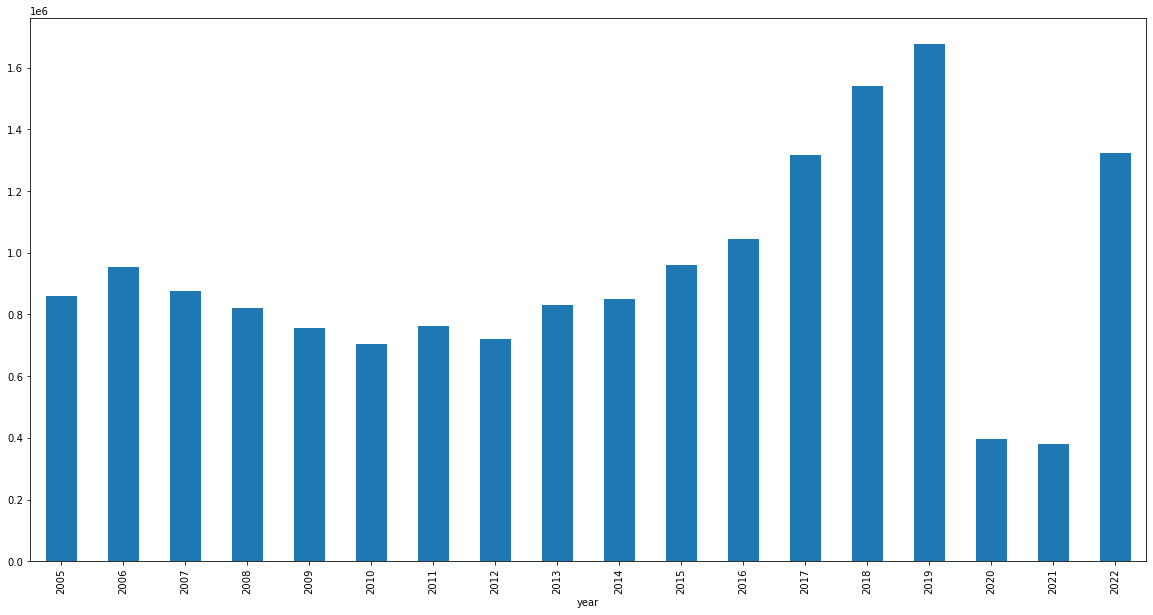

In [50]:
df.groupby(['year'])['visas_not_issued'].sum().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

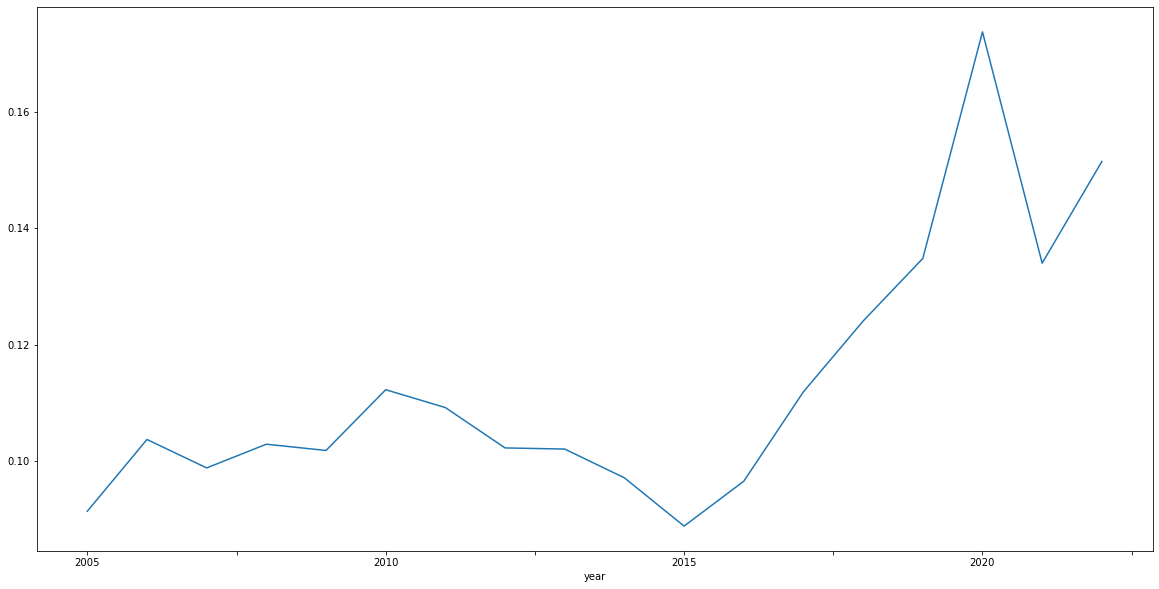

In [51]:
df.groupby(['year'])['visa_refusal_rate'].mean().plot.line(figsize=(20,10))

<AxesSubplot:title={'center':'visa_refusal_rate'}, xlabel='year'>

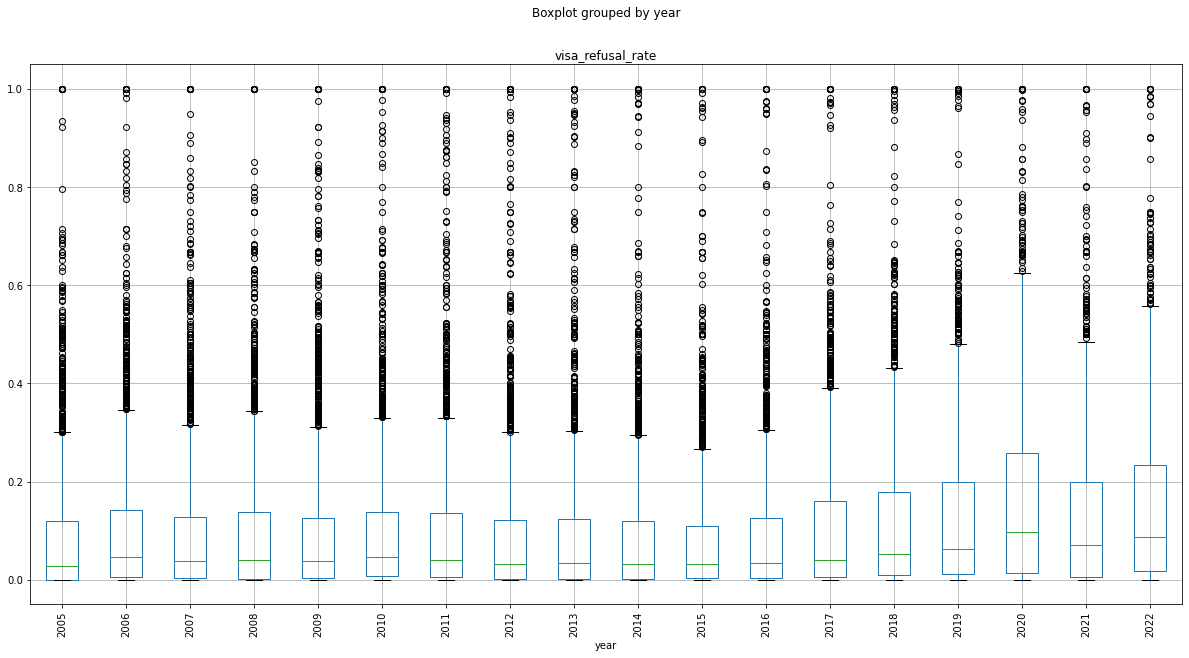

In [52]:
df.boxplot(column='visa_refusal_rate', by='year', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='schengen_state'>

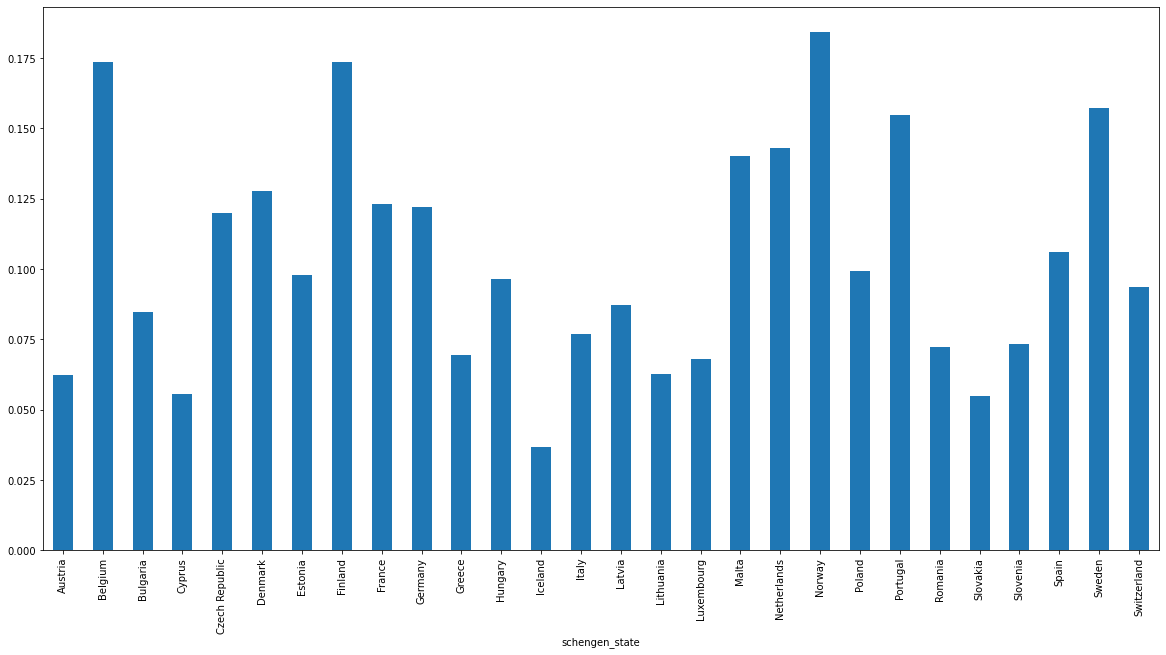

In [56]:
df.groupby(['schengen_state'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:title={'center':'visa_refusal_rate'}, xlabel='schengen_state'>

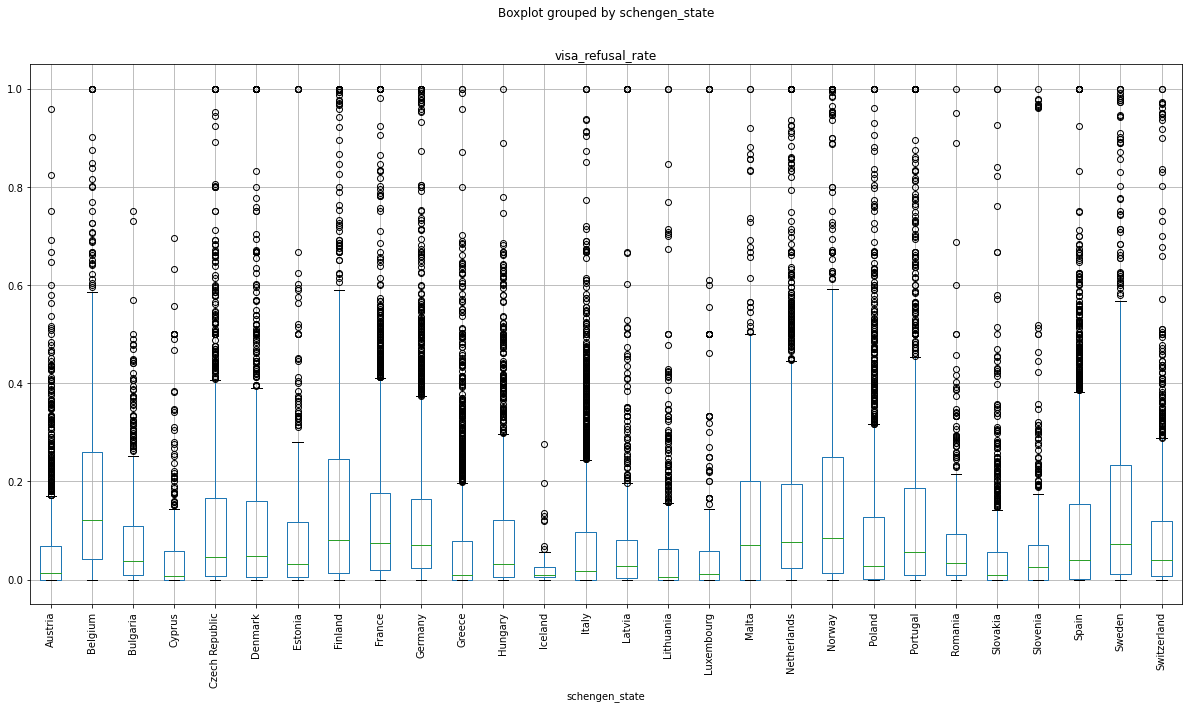

In [57]:
df.boxplot(column='visa_refusal_rate', by='schengen_state', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='year', ylabel='visa_refusal_rate'>

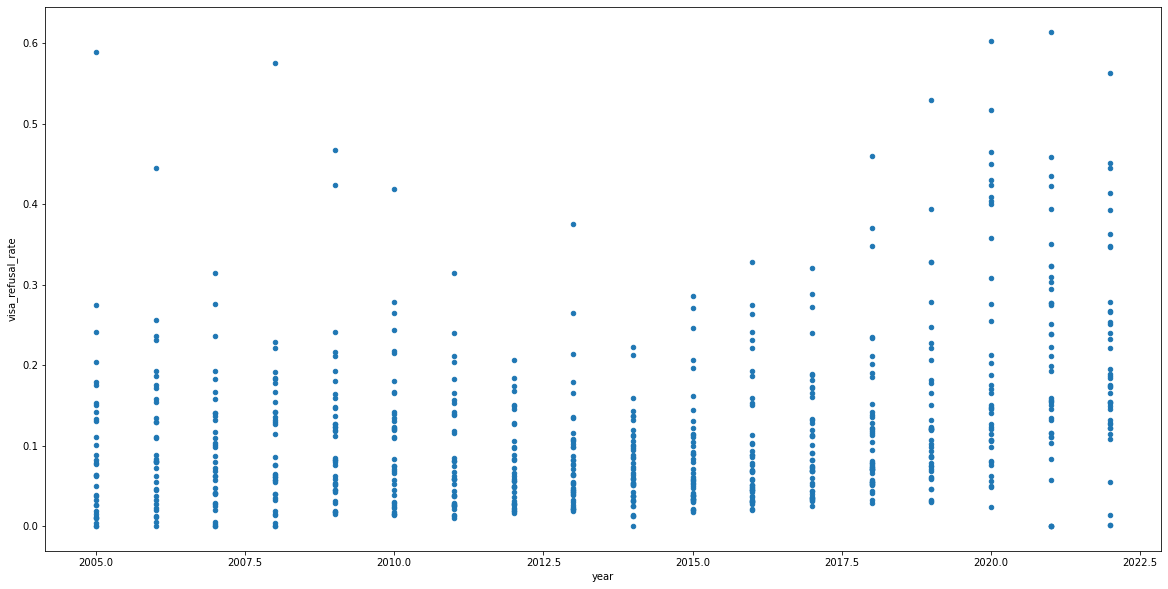

In [54]:
df.where(df["origin_country"] == 'INDIA').plot.scatter(x='year',y='visa_refusal_rate',figsize=(20,10))

<AxesSubplot:xlabel='year'>

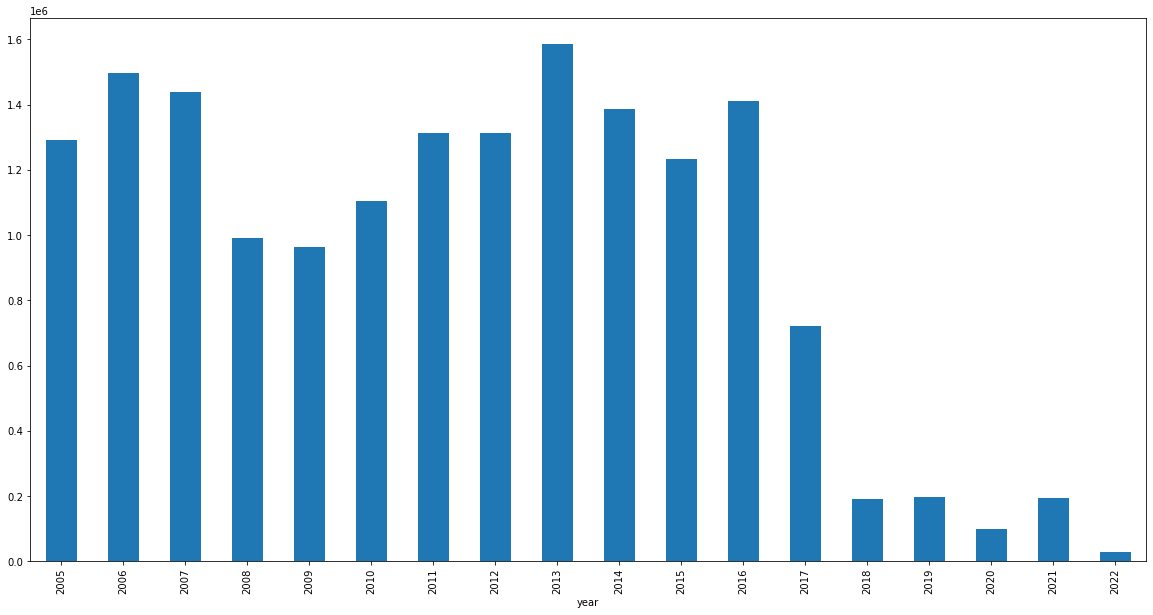

In [55]:
df.where(df["origin_country"] == 'UKRAINE').groupby(['year'])['visas_applied'].sum().plot.bar(figsize=(20,10))

In [64]:
issuing_countries = df['schengen_state'].drop_duplicates()
issuing_countries

0               Austria
62              Belgium
147      Czech Republic
226             Denmark
264             Estonia
284             Finland
333              France
480             Germany
642              Greece
743             Hungary
819             Iceland
824               Italy
986              Latvia
1008          Lithuania
1033         Luxembourg
1057              Malta
1082        Netherlands
1193             Norway
1222             Poland
1323           Portugal
1403           Slovakia
1456           Slovenia
1481              Spain
1636             Sweden
1681        Switzerland
20267            Cyprus
22402          Bulgaria
23242           Romania
Name: schengen_state, dtype: object

<AxesSubplot:xlabel='year'>

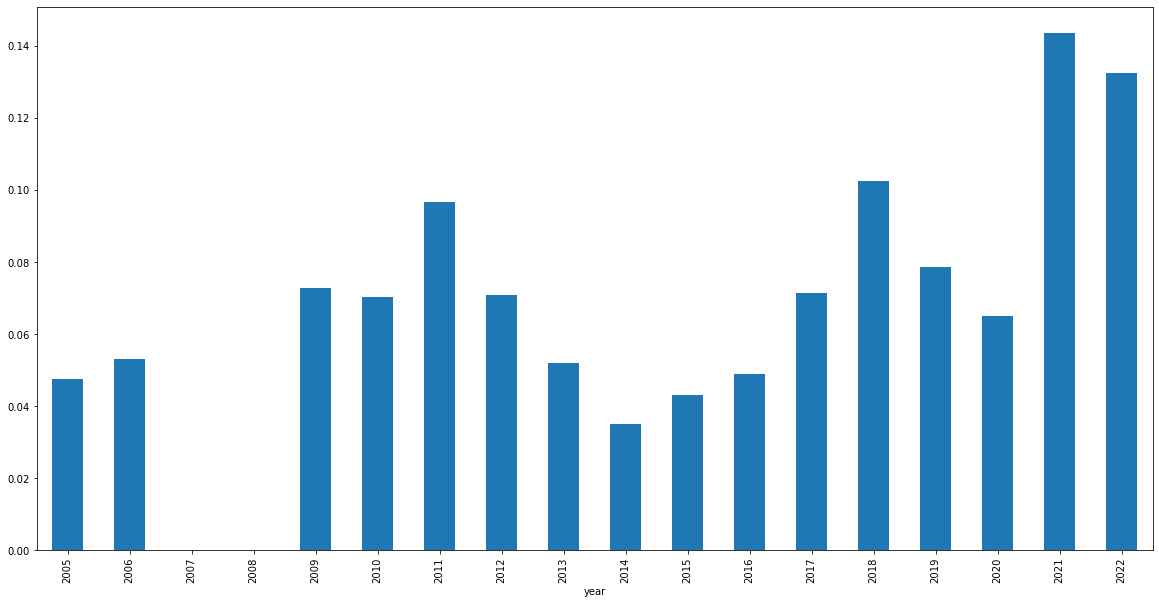

In [70]:
df[df['schengen_state'] == 'Austria'].groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

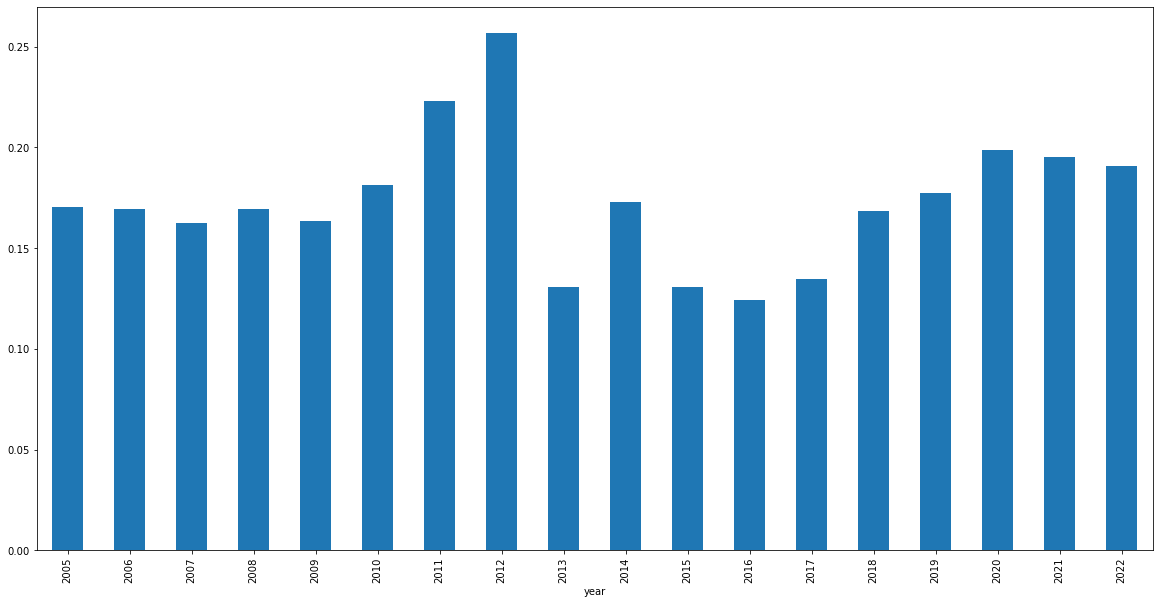

In [71]:
df[df['schengen_state'] == 'Belgium'].groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

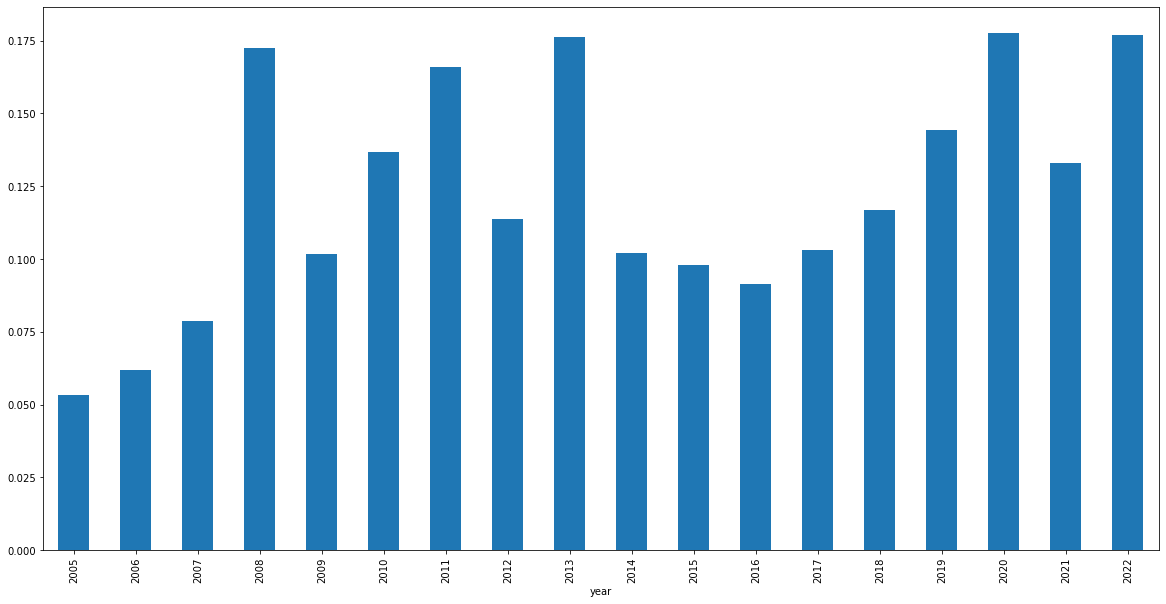

In [72]:
df[df['schengen_state'] == 'Czech Republic'].groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

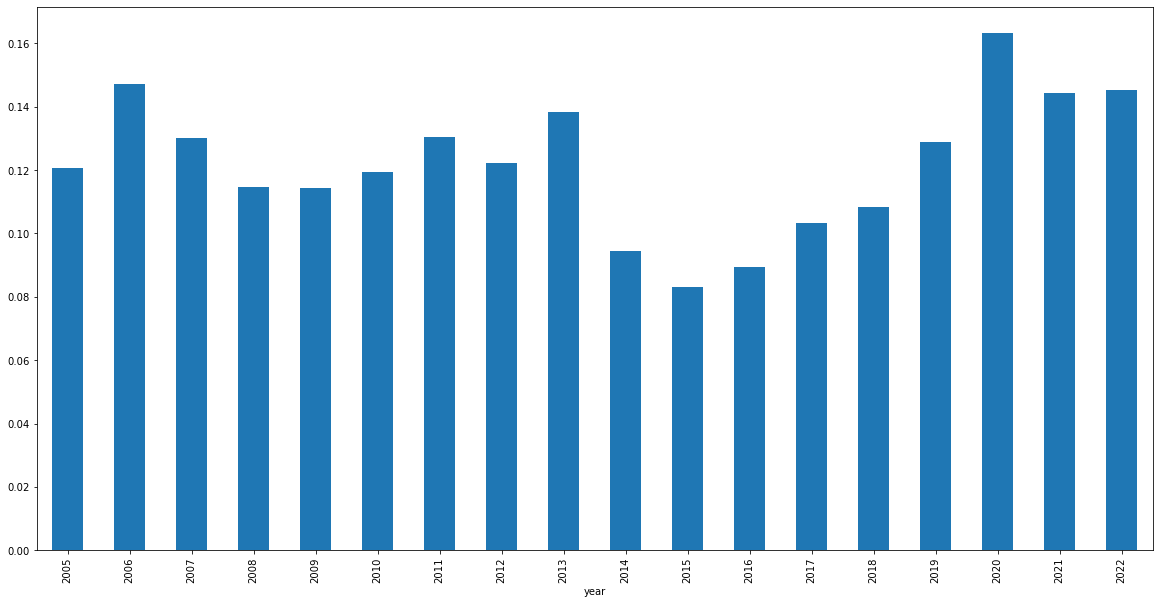

In [73]:
df[df['schengen_state'] == 'Germany'].groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

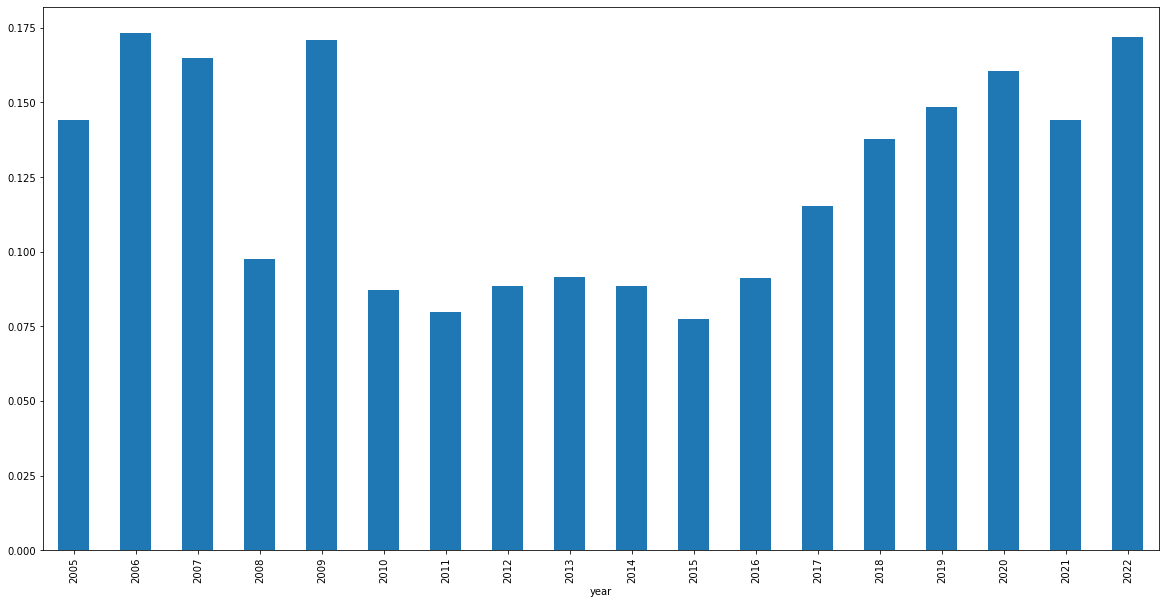

In [74]:
df[df['schengen_state'] == 'France'].groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

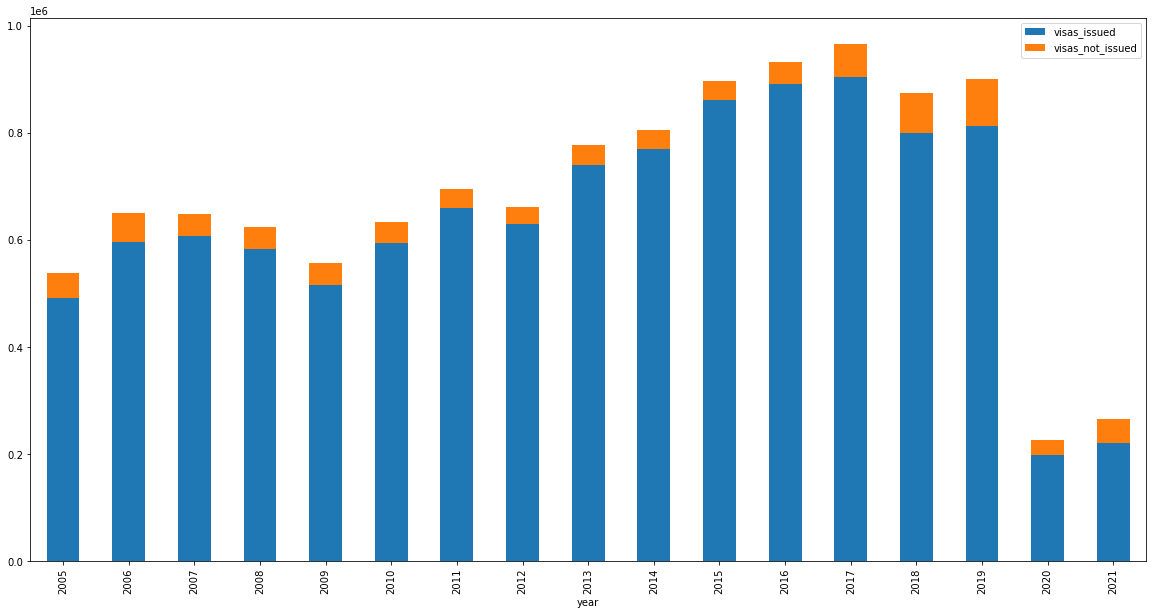

In [80]:
df.where(df["origin_country"] == 'TURKEY').groupby(['year'])[['visas_issued','visas_not_issued']].sum().plot.bar(figsize=(20,10), stacked=True)

<AxesSubplot:xlabel='schengen_state'>

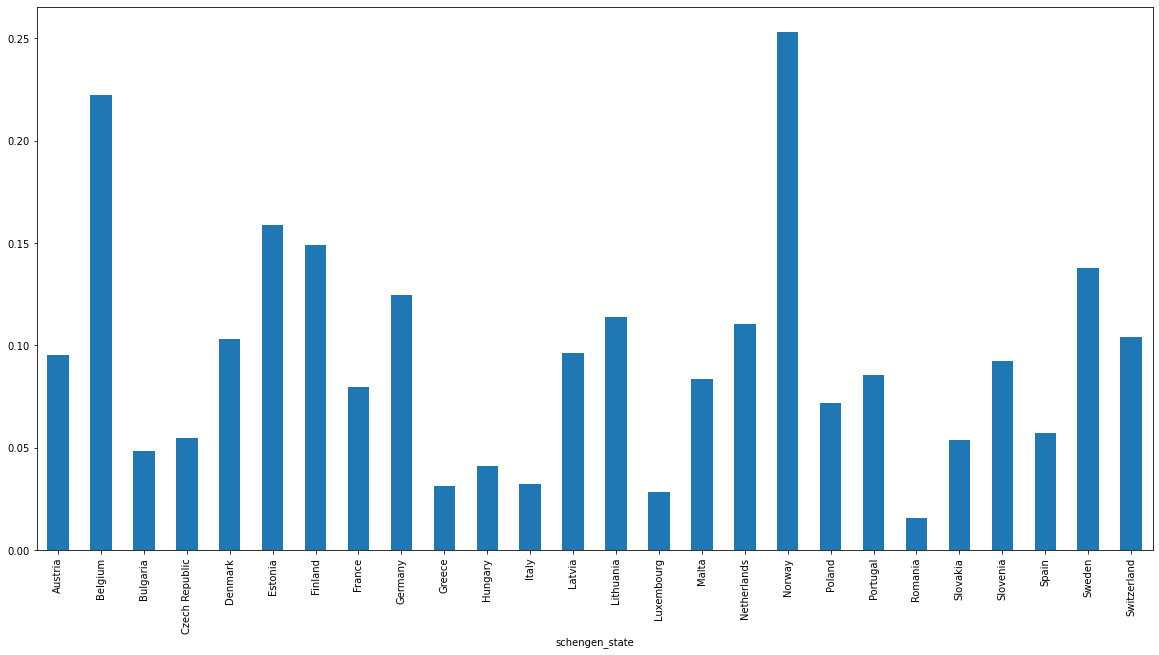

In [76]:
df[df['origin_country'] == 'TURKEY'].groupby(['schengen_state'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))